In [20]:
#importing libraries

import numpy as np
import h5py
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pywt

In [21]:
import os
os.getcwd()

'E:\\SRA_Groeber\\Clustering'

In [22]:
#Reading the file

filename = 'file.hdf5'
f = h5py.File("NewThermalHistories.hdf5", 'r')

In [23]:
# List all groups
list(f.keys())

['ThermalHistories']

In [24]:
# Get the data
data = f['ThermalHistories']

In [25]:
data

<HDF5 group "/ThermalHistories" (13800 members)>

In [26]:
len(data)

13800

In [27]:
for key in data.keys():
    print(key)

0
1
10
100
1000
10000
10001
10002
10003
10004
10005
10006
10007
10008
10009
1001
10010
10011
10012
10013
10014
10015
10016
10017
10018
10019
1002
10020
10021
10022
10023
10024
10025
10026
10027
10028
10029
1003
10030
10031
10032
10033
10034
10035
10036
10037
10038
10039
1004
10040
10041
10042
10043
10044
10045
10046
10047
10048
10049
1005
10050
10051
10052
10053
10054
10055
10056
10057
10058
10059
1006
10060
10061
10062
10063
10064
10065
10066
10067
10068
10069
1007
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
1008
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
1009
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
101
1010
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
1011
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
1012
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
1013
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
1014
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
1015
10150

11514
11515
11516
11517
11518
11519
1152
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
1153
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
1154
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
1155
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
1156
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
1157
11570
11571
11572
11573
11574
11575
11576
11577
11578
11579
1158
11580
11581
11582
11583
11584
11585
11586
11587
11588
11589
1159
11590
11591
11592
11593
11594
11595
11596
11597
11598
11599
116
1160
11600
11601
11602
11603
11604
11605
11606
11607
11608
11609
1161
11610
11611
11612
11613
11614
11615
11616
11617
11618
11619
1162
11620
11621
11622
11623
11624
11625
11626
11627
11628
11629
1163
11630
11631
11632
11633
11634
11635
11636
11637
11638
11639
1164
11640
11641
11642
11643
11644
11645
11646
11647
11648
11649
1165
11650
11651
11652
11653
11654
11655
11656
11657
11658
11659
1166
11660
11661
11662
11663
11664
11665
11666
116

12864
12865
12866
12867
12868
12869
1287
12870
12871
12872
12873
12874
12875
12876
12877
12878
12879
1288
12880
12881
12882
12883
12884
12885
12886
12887
12888
12889
1289
12890
12891
12892
12893
12894
12895
12896
12897
12898
12899
129
1290
12900
12901
12902
12903
12904
12905
12906
12907
12908
12909
1291
12910
12911
12912
12913
12914
12915
12916
12917
12918
12919
1292
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
1293
12930
12931
12932
12933
12934
12935
12936
12937
12938
12939
1294
12940
12941
12942
12943
12944
12945
12946
12947
12948
12949
1295
12950
12951
12952
12953
12954
12955
12956
12957
12958
12959
1296
12960
12961
12962
12963
12964
12965
12966
12967
12968
12969
1297
12970
12971
12972
12973
12974
12975
12976
12977
12978
12979
1298
12980
12981
12982
12983
12984
12985
12986
12987
12988
12989
1299
12990
12991
12992
12993
12994
12995
12996
12997
12998
12999
13
130
1300
13000
13001
13002
13003
13004
13005
13006
13007
13008
13009
1301
13010
13011
13012
13013
13014
13015
13

2243
2244
2245
2246
2247
2248
2249
225
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
226
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
227
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
228
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
229
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
23
230
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
231
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
232
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
233
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
234
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
235
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
236
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
237
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
238
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
239
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
24
240
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
241
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
242
2420
2421
2422
2423
2424
2425
2426
24

4943
4944
4945
4946
4947
4948
4949
495
4950
4951
4952
4953
4954
4955
4956
4957
4958
4959
496
4960
4961
4962
4963
4964
4965
4966
4967
4968
4969
497
4970
4971
4972
4973
4974
4975
4976
4977
4978
4979
498
4980
4981
4982
4983
4984
4985
4986
4987
4988
4989
499
4990
4991
4992
4993
4994
4995
4996
4997
4998
4999
5
50
500
5000
5001
5002
5003
5004
5005
5006
5007
5008
5009
501
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
502
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
503
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
504
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
505
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
506
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
507
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
508
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
509
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
51
510
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
511
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
512
5120
5121
5122
5123
5124
5125
5126


7192
7193
7194
7195
7196
7197
7198
7199
72
720
7200
7201
7202
7203
7204
7205
7206
7207
7208
7209
721
7210
7211
7212
7213
7214
7215
7216
7217
7218
7219
722
7220
7221
7222
7223
7224
7225
7226
7227
7228
7229
723
7230
7231
7232
7233
7234
7235
7236
7237
7238
7239
724
7240
7241
7242
7243
7244
7245
7246
7247
7248
7249
725
7250
7251
7252
7253
7254
7255
7256
7257
7258
7259
726
7260
7261
7262
7263
7264
7265
7266
7267
7268
7269
727
7270
7271
7272
7273
7274
7275
7276
7277
7278
7279
728
7280
7281
7282
7283
7284
7285
7286
7287
7288
7289
729
7290
7291
7292
7293
7294
7295
7296
7297
7298
7299
73
730
7300
7301
7302
7303
7304
7305
7306
7307
7308
7309
731
7310
7311
7312
7313
7314
7315
7316
7317
7318
7319
732
7320
7321
7322
7323
7324
7325
7326
7327
7328
7329
733
7330
7331
7332
7333
7334
7335
7336
7337
7338
7339
734
7340
7341
7342
7343
7344
7345
7346
7347
7348
7349
735
7350
7351
7352
7353
7354
7355
7356
7357
7358
7359
736
7360
7361
7362
7363
7364
7365
7366
7367
7368
7369
737
7370
7371
7372
7373
7374
7375
73

9441
9442
9443
9444
9445
9446
9447
9448
9449
945
9450
9451
9452
9453
9454
9455
9456
9457
9458
9459
946
9460
9461
9462
9463
9464
9465
9466
9467
9468
9469
947
9470
9471
9472
9473
9474
9475
9476
9477
9478
9479
948
9480
9481
9482
9483
9484
9485
9486
9487
9488
9489
949
9490
9491
9492
9493
9494
9495
9496
9497
9498
9499
95
950
9500
9501
9502
9503
9504
9505
9506
9507
9508
9509
951
9510
9511
9512
9513
9514
9515
9516
9517
9518
9519
952
9520
9521
9522
9523
9524
9525
9526
9527
9528
9529
953
9530
9531
9532
9533
9534
9535
9536
9537
9538
9539
954
9540
9541
9542
9543
9544
9545
9546
9547
9548
9549
955
9550
9551
9552
9553
9554
9555
9556
9557
9558
9559
956
9560
9561
9562
9563
9564
9565
9566
9567
9568
9569
957
9570
9571
9572
9573
9574
9575
9576
9577
9578
9579
958
9580
9581
9582
9583
9584
9585
9586
9587
9588
9589
959
9590
9591
9592
9593
9594
9595
9596
9597
9598
9599
96
960
9600
9601
9602
9603
9604
9605
9606
9607
9608
9609
961
9610
9611
9612
9613
9614
9615
9616
9617
9618
9619
962
9620
9621
9622
9623
9624
96

In [28]:
for key in data.keys():
    print(data[key])
    

<HDF5 dataset "0": shape (1,), type "<f4">
<HDF5 dataset "1": shape (1,), type "<f4">
<HDF5 dataset "10": shape (1,), type "<f4">
<HDF5 dataset "100": shape (1497,), type "<f4">
<HDF5 dataset "1000": shape (1,), type "<f4">
<HDF5 dataset "10000": shape (1,), type "<f4">
<HDF5 dataset "10001": shape (1,), type "<f4">
<HDF5 dataset "10002": shape (1,), type "<f4">
<HDF5 dataset "10003": shape (1,), type "<f4">
<HDF5 dataset "10004": shape (1,), type "<f4">
<HDF5 dataset "10005": shape (1,), type "<f4">
<HDF5 dataset "10006": shape (1,), type "<f4">
<HDF5 dataset "10007": shape (1,), type "<f4">
<HDF5 dataset "10008": shape (1,), type "<f4">
<HDF5 dataset "10009": shape (1,), type "<f4">
<HDF5 dataset "1001": shape (1,), type "<f4">
<HDF5 dataset "10010": shape (1,), type "<f4">
<HDF5 dataset "10011": shape (1,), type "<f4">
<HDF5 dataset "10012": shape (1,), type "<f4">
<HDF5 dataset "10013": shape (1011,), type "<f4">
<HDF5 dataset "10014": shape (1073,), type "<f4">
<HDF5 dataset "1001

<HDF5 dataset "10322": shape (1,), type "<f4">
<HDF5 dataset "10323": shape (1,), type "<f4">
<HDF5 dataset "10324": shape (1,), type "<f4">
<HDF5 dataset "10325": shape (1,), type "<f4">
<HDF5 dataset "10326": shape (1,), type "<f4">
<HDF5 dataset "10327": shape (1,), type "<f4">
<HDF5 dataset "10328": shape (1,), type "<f4">
<HDF5 dataset "10329": shape (1,), type "<f4">
<HDF5 dataset "1033": shape (2597,), type "<f4">
<HDF5 dataset "10330": shape (1,), type "<f4">
<HDF5 dataset "10331": shape (1,), type "<f4">
<HDF5 dataset "10332": shape (1,), type "<f4">
<HDF5 dataset "10333": shape (1,), type "<f4">
<HDF5 dataset "10334": shape (1,), type "<f4">
<HDF5 dataset "10335": shape (1,), type "<f4">
<HDF5 dataset "10336": shape (1,), type "<f4">
<HDF5 dataset "10337": shape (1,), type "<f4">
<HDF5 dataset "10338": shape (1,), type "<f4">
<HDF5 dataset "10339": shape (1,), type "<f4">
<HDF5 dataset "1034": shape (2726,), type "<f4">
<HDF5 dataset "10340": shape (1,), type "<f4">
<HDF5 dat

<HDF5 dataset "1059": shape (4328,), type "<f4">
<HDF5 dataset "10590": shape (1,), type "<f4">
<HDF5 dataset "10591": shape (1,), type "<f4">
<HDF5 dataset "10592": shape (1,), type "<f4">
<HDF5 dataset "10593": shape (1,), type "<f4">
<HDF5 dataset "10594": shape (1,), type "<f4">
<HDF5 dataset "10595": shape (1,), type "<f4">
<HDF5 dataset "10596": shape (1,), type "<f4">
<HDF5 dataset "10597": shape (1,), type "<f4">
<HDF5 dataset "10598": shape (1,), type "<f4">
<HDF5 dataset "10599": shape (1,), type "<f4">
<HDF5 dataset "106": shape (1382,), type "<f4">
<HDF5 dataset "1060": shape (4329,), type "<f4">
<HDF5 dataset "10600": shape (1,), type "<f4">
<HDF5 dataset "10601": shape (1,), type "<f4">
<HDF5 dataset "10602": shape (1,), type "<f4">
<HDF5 dataset "10603": shape (1,), type "<f4">
<HDF5 dataset "10604": shape (1,), type "<f4">
<HDF5 dataset "10605": shape (1,), type "<f4">
<HDF5 dataset "10606": shape (1,), type "<f4">
<HDF5 dataset "10607": shape (1,), type "<f4">
<HDF5 da

<HDF5 dataset "11233": shape (2212,), type "<f4">
<HDF5 dataset "11234": shape (2242,), type "<f4">
<HDF5 dataset "11235": shape (2310,), type "<f4">
<HDF5 dataset "11236": shape (2340,), type "<f4">
<HDF5 dataset "11237": shape (2406,), type "<f4">
<HDF5 dataset "11238": shape (2432,), type "<f4">
<HDF5 dataset "11239": shape (2432,), type "<f4">
<HDF5 dataset "1124": shape (1,), type "<f4">
<HDF5 dataset "11240": shape (2432,), type "<f4">
<HDF5 dataset "11241": shape (2432,), type "<f4">
<HDF5 dataset "11242": shape (2432,), type "<f4">
<HDF5 dataset "11243": shape (2431,), type "<f4">
<HDF5 dataset "11244": shape (2419,), type "<f4">
<HDF5 dataset "11245": shape (2387,), type "<f4">
<HDF5 dataset "11246": shape (2321,), type "<f4">
<HDF5 dataset "11247": shape (2285,), type "<f4">
<HDF5 dataset "11248": shape (2221,), type "<f4">
<HDF5 dataset "11249": shape (2123,), type "<f4">
<HDF5 dataset "1125": shape (1,), type "<f4">
<HDF5 dataset "11250": shape (2087,), type "<f4">
<HDF5 da

<HDF5 dataset "11683": shape (1,), type "<f4">
<HDF5 dataset "11684": shape (1,), type "<f4">
<HDF5 dataset "11685": shape (1,), type "<f4">
<HDF5 dataset "11686": shape (1,), type "<f4">
<HDF5 dataset "11687": shape (1,), type "<f4">
<HDF5 dataset "11688": shape (1,), type "<f4">
<HDF5 dataset "11689": shape (1,), type "<f4">
<HDF5 dataset "1169": shape (3879,), type "<f4">
<HDF5 dataset "11690": shape (1010,), type "<f4">
<HDF5 dataset "11691": shape (1101,), type "<f4">
<HDF5 dataset "11692": shape (1114,), type "<f4">
<HDF5 dataset "11693": shape (1203,), type "<f4">
<HDF5 dataset "11694": shape (1217,), type "<f4">
<HDF5 dataset "11695": shape (1305,), type "<f4">
<HDF5 dataset "11696": shape (1320,), type "<f4">
<HDF5 dataset "11697": shape (1407,), type "<f4">
<HDF5 dataset "11698": shape (1422,), type "<f4">
<HDF5 dataset "11699": shape (1510,), type "<f4">
<HDF5 dataset "117": shape (1094,), type "<f4">
<HDF5 dataset "1170": shape (3913,), type "<f4">
<HDF5 dataset "11700": sh

<HDF5 dataset "12583": shape (1301,), type "<f4">
<HDF5 dataset "12584": shape (1205,), type "<f4">
<HDF5 dataset "12585": shape (1186,), type "<f4">
<HDF5 dataset "12586": shape (1104,), type "<f4">
<HDF5 dataset "12587": shape (1085,), type "<f4">
<HDF5 dataset "12588": shape (1013,), type "<f4">
<HDF5 dataset "12589": shape (1,), type "<f4">
<HDF5 dataset "1259": shape (1,), type "<f4">
<HDF5 dataset "12590": shape (1,), type "<f4">
<HDF5 dataset "12591": shape (1,), type "<f4">
<HDF5 dataset "12592": shape (1,), type "<f4">
<HDF5 dataset "12593": shape (1,), type "<f4">
<HDF5 dataset "12594": shape (1,), type "<f4">
<HDF5 dataset "12595": shape (1,), type "<f4">
<HDF5 dataset "12596": shape (1,), type "<f4">
<HDF5 dataset "12597": shape (1,), type "<f4">
<HDF5 dataset "12598": shape (1,), type "<f4">
<HDF5 dataset "12599": shape (1,), type "<f4">
<HDF5 dataset "126": shape (1,), type "<f4">
<HDF5 dataset "1260": shape (1,), type "<f4">
<HDF5 dataset "12600": shape (1,), type "<f4">

<HDF5 dataset "13351": shape (1,), type "<f4">
<HDF5 dataset "13352": shape (1,), type "<f4">
<HDF5 dataset "13353": shape (1,), type "<f4">
<HDF5 dataset "13354": shape (1,), type "<f4">
<HDF5 dataset "13355": shape (1,), type "<f4">
<HDF5 dataset "13356": shape (1,), type "<f4">
<HDF5 dataset "13357": shape (1,), type "<f4">
<HDF5 dataset "13358": shape (1,), type "<f4">
<HDF5 dataset "13359": shape (1,), type "<f4">
<HDF5 dataset "1336": shape (1,), type "<f4">
<HDF5 dataset "13360": shape (1,), type "<f4">
<HDF5 dataset "13361": shape (1,), type "<f4">
<HDF5 dataset "13362": shape (1,), type "<f4">
<HDF5 dataset "13363": shape (1,), type "<f4">
<HDF5 dataset "13364": shape (1,), type "<f4">
<HDF5 dataset "13365": shape (1,), type "<f4">
<HDF5 dataset "13366": shape (1,), type "<f4">
<HDF5 dataset "13367": shape (1,), type "<f4">
<HDF5 dataset "13368": shape (1,), type "<f4">
<HDF5 dataset "13369": shape (1,), type "<f4">
<HDF5 dataset "1337": shape (1,), type "<f4">
<HDF5 dataset "

<HDF5 dataset "1670": shape (4930,), type "<f4">
<HDF5 dataset "1671": shape (4930,), type "<f4">
<HDF5 dataset "1672": shape (4930,), type "<f4">
<HDF5 dataset "1673": shape (4929,), type "<f4">
<HDF5 dataset "1674": shape (4929,), type "<f4">
<HDF5 dataset "1675": shape (4928,), type "<f4">
<HDF5 dataset "1676": shape (4928,), type "<f4">
<HDF5 dataset "1677": shape (4927,), type "<f4">
<HDF5 dataset "1678": shape (1145,), type "<f4">
<HDF5 dataset "1679": shape (1114,), type "<f4">
<HDF5 dataset "168": shape (1,), type "<f4">
<HDF5 dataset "1680": shape (1,), type "<f4">
<HDF5 dataset "1681": shape (1,), type "<f4">
<HDF5 dataset "1682": shape (1,), type "<f4">
<HDF5 dataset "1683": shape (1,), type "<f4">
<HDF5 dataset "1684": shape (1,), type "<f4">
<HDF5 dataset "1685": shape (1,), type "<f4">
<HDF5 dataset "1686": shape (1,), type "<f4">
<HDF5 dataset "1687": shape (1,), type "<f4">
<HDF5 dataset "1688": shape (1,), type "<f4">
<HDF5 dataset "1689": shape (1,), type "<f4">
<HDF5

<HDF5 dataset "2379": shape (4934,), type "<f4">
<HDF5 dataset "238": shape (1091,), type "<f4">
<HDF5 dataset "2380": shape (5033,), type "<f4">
<HDF5 dataset "2381": shape (5033,), type "<f4">
<HDF5 dataset "2382": shape (5033,), type "<f4">
<HDF5 dataset "2383": shape (5033,), type "<f4">
<HDF5 dataset "2384": shape (5033,), type "<f4">
<HDF5 dataset "2385": shape (5033,), type "<f4">
<HDF5 dataset "2386": shape (5033,), type "<f4">
<HDF5 dataset "2387": shape (5033,), type "<f4">
<HDF5 dataset "2388": shape (5033,), type "<f4">
<HDF5 dataset "2389": shape (5033,), type "<f4">
<HDF5 dataset "239": shape (1052,), type "<f4">
<HDF5 dataset "2390": shape (5033,), type "<f4">
<HDF5 dataset "2391": shape (5033,), type "<f4">
<HDF5 dataset "2392": shape (5033,), type "<f4">
<HDF5 dataset "2393": shape (5033,), type "<f4">
<HDF5 dataset "2394": shape (5033,), type "<f4">
<HDF5 dataset "2395": shape (5033,), type "<f4">
<HDF5 dataset "2396": shape (5033,), type "<f4">
<HDF5 dataset "2397": 

<HDF5 dataset "2862": shape (5033,), type "<f4">
<HDF5 dataset "2863": shape (5033,), type "<f4">
<HDF5 dataset "2864": shape (5033,), type "<f4">
<HDF5 dataset "2865": shape (5033,), type "<f4">
<HDF5 dataset "2866": shape (5033,), type "<f4">
<HDF5 dataset "2867": shape (5033,), type "<f4">
<HDF5 dataset "2868": shape (5033,), type "<f4">
<HDF5 dataset "2869": shape (5033,), type "<f4">
<HDF5 dataset "287": shape (1,), type "<f4">
<HDF5 dataset "2870": shape (5033,), type "<f4">
<HDF5 dataset "2871": shape (5033,), type "<f4">
<HDF5 dataset "2872": shape (5033,), type "<f4">
<HDF5 dataset "2873": shape (5033,), type "<f4">
<HDF5 dataset "2874": shape (5033,), type "<f4">
<HDF5 dataset "2875": shape (5033,), type "<f4">
<HDF5 dataset "2876": shape (5033,), type "<f4">
<HDF5 dataset "2877": shape (5033,), type "<f4">
<HDF5 dataset "2878": shape (5033,), type "<f4">
<HDF5 dataset "2879": shape (5033,), type "<f4">
<HDF5 dataset "288": shape (1,), type "<f4">
<HDF5 dataset "2880": shape 

<HDF5 dataset "3310": shape (2710,), type "<f4">
<HDF5 dataset "3311": shape (2833,), type "<f4">
<HDF5 dataset "3312": shape (2905,), type "<f4">
<HDF5 dataset "3313": shape (2997,), type "<f4">
<HDF5 dataset "3314": shape (3064,), type "<f4">
<HDF5 dataset "3315": shape (3194,), type "<f4">
<HDF5 dataset "3316": shape (3227,), type "<f4">
<HDF5 dataset "3317": shape (3354,), type "<f4">
<HDF5 dataset "3318": shape (3387,), type "<f4">
<HDF5 dataset "3319": shape (3519,), type "<f4">
<HDF5 dataset "332": shape (1543,), type "<f4">
<HDF5 dataset "3320": shape (3582,), type "<f4">
<HDF5 dataset "3321": shape (3680,), type "<f4">
<HDF5 dataset "3322": shape (3741,), type "<f4">
<HDF5 dataset "3323": shape (3875,), type "<f4">
<HDF5 dataset "3324": shape (3905,), type "<f4">
<HDF5 dataset "3325": shape (4035,), type "<f4">
<HDF5 dataset "3326": shape (4064,), type "<f4">
<HDF5 dataset "3327": shape (4199,), type "<f4">
<HDF5 dataset "3328": shape (4350,), type "<f4">
<HDF5 dataset "3329":

<HDF5 dataset "3761": shape (1231,), type "<f4">
<HDF5 dataset "3762": shape (1209,), type "<f4">
<HDF5 dataset "3763": shape (1230,), type "<f4">
<HDF5 dataset "3764": shape (1197,), type "<f4">
<HDF5 dataset "3765": shape (1175,), type "<f4">
<HDF5 dataset "3766": shape (1169,), type "<f4">
<HDF5 dataset "3767": shape (1163,), type "<f4">
<HDF5 dataset "3768": shape (1137,), type "<f4">
<HDF5 dataset "3769": shape (1109,), type "<f4">
<HDF5 dataset "377": shape (1,), type "<f4">
<HDF5 dataset "3770": shape (1102,), type "<f4">
<HDF5 dataset "3771": shape (1069,), type "<f4">
<HDF5 dataset "3772": shape (1,), type "<f4">
<HDF5 dataset "3773": shape (1,), type "<f4">
<HDF5 dataset "3774": shape (1,), type "<f4">
<HDF5 dataset "3775": shape (1,), type "<f4">
<HDF5 dataset "3776": shape (1,), type "<f4">
<HDF5 dataset "3777": shape (1,), type "<f4">
<HDF5 dataset "3778": shape (1,), type "<f4">
<HDF5 dataset "3779": shape (1,), type "<f4">
<HDF5 dataset "378": shape (1,), type "<f4">
<HD

<HDF5 dataset "421": shape (1,), type "<f4">
<HDF5 dataset "4210": shape (1288,), type "<f4">
<HDF5 dataset "4211": shape (1314,), type "<f4">
<HDF5 dataset "4212": shape (1321,), type "<f4">
<HDF5 dataset "4213": shape (1345,), type "<f4">
<HDF5 dataset "4214": shape (1351,), type "<f4">
<HDF5 dataset "4215": shape (1376,), type "<f4">
<HDF5 dataset "4216": shape (1382,), type "<f4">
<HDF5 dataset "4217": shape (1409,), type "<f4">
<HDF5 dataset "4218": shape (1413,), type "<f4">
<HDF5 dataset "4219": shape (1437,), type "<f4">
<HDF5 dataset "422": shape (1,), type "<f4">
<HDF5 dataset "4220": shape (1437,), type "<f4">
<HDF5 dataset "4221": shape (1436,), type "<f4">
<HDF5 dataset "4222": shape (1438,), type "<f4">
<HDF5 dataset "4223": shape (1436,), type "<f4">
<HDF5 dataset "4224": shape (1437,), type "<f4">
<HDF5 dataset "4225": shape (1436,), type "<f4">
<HDF5 dataset "4226": shape (1411,), type "<f4">
<HDF5 dataset "4227": shape (1430,), type "<f4">
<HDF5 dataset "4228": shape 

<HDF5 dataset "4660": shape (2272,), type "<f4">
<HDF5 dataset "4661": shape (2197,), type "<f4">
<HDF5 dataset "4662": shape (2155,), type "<f4">
<HDF5 dataset "4663": shape (2078,), type "<f4">
<HDF5 dataset "4664": shape (2036,), type "<f4">
<HDF5 dataset "4665": shape (1959,), type "<f4">
<HDF5 dataset "4666": shape (1918,), type "<f4">
<HDF5 dataset "4667": shape (1840,), type "<f4">
<HDF5 dataset "4668": shape (1801,), type "<f4">
<HDF5 dataset "4669": shape (1721,), type "<f4">
<HDF5 dataset "467": shape (1392,), type "<f4">
<HDF5 dataset "4670": shape (1683,), type "<f4">
<HDF5 dataset "4671": shape (1602,), type "<f4">
<HDF5 dataset "4672": shape (1565,), type "<f4">
<HDF5 dataset "4673": shape (1452,), type "<f4">
<HDF5 dataset "4674": shape (1370,), type "<f4">
<HDF5 dataset "4675": shape (1334,), type "<f4">
<HDF5 dataset "4676": shape (1253,), type "<f4">
<HDF5 dataset "4677": shape (1216,), type "<f4">
<HDF5 dataset "4678": shape (1134,), type "<f4">
<HDF5 dataset "4679":

<HDF5 dataset "5109": shape (1895,), type "<f4">
<HDF5 dataset "511": shape (1,), type "<f4">
<HDF5 dataset "5110": shape (1916,), type "<f4">
<HDF5 dataset "5111": shape (1974,), type "<f4">
<HDF5 dataset "5112": shape (2001,), type "<f4">
<HDF5 dataset "5113": shape (2059,), type "<f4">
<HDF5 dataset "5114": shape (2086,), type "<f4">
<HDF5 dataset "5115": shape (2144,), type "<f4">
<HDF5 dataset "5116": shape (2170,), type "<f4">
<HDF5 dataset "5117": shape (2201,), type "<f4">
<HDF5 dataset "5118": shape (2250,), type "<f4">
<HDF5 dataset "5119": shape (2285,), type "<f4">
<HDF5 dataset "512": shape (1,), type "<f4">
<HDF5 dataset "5120": shape (2335,), type "<f4">
<HDF5 dataset "5121": shape (2369,), type "<f4">
<HDF5 dataset "5122": shape (2394,), type "<f4">
<HDF5 dataset "5123": shape (2430,), type "<f4">
<HDF5 dataset "5124": shape (2488,), type "<f4">
<HDF5 dataset "5125": shape (2546,), type "<f4">
<HDF5 dataset "5126": shape (2655,), type "<f4">
<HDF5 dataset "5127": shape 

<HDF5 dataset "556": shape (2404,), type "<f4">
<HDF5 dataset "5560": shape (1476,), type "<f4">
<HDF5 dataset "5561": shape (1475,), type "<f4">
<HDF5 dataset "5562": shape (1476,), type "<f4">
<HDF5 dataset "5563": shape (1464,), type "<f4">
<HDF5 dataset "5564": shape (1458,), type "<f4">
<HDF5 dataset "5565": shape (1464,), type "<f4">
<HDF5 dataset "5566": shape (1456,), type "<f4">
<HDF5 dataset "5567": shape (1463,), type "<f4">
<HDF5 dataset "5568": shape (1456,), type "<f4">
<HDF5 dataset "5569": shape (1464,), type "<f4">
<HDF5 dataset "557": shape (2528,), type "<f4">
<HDF5 dataset "5570": shape (1455,), type "<f4">
<HDF5 dataset "5571": shape (1472,), type "<f4">
<HDF5 dataset "5572": shape (1475,), type "<f4">
<HDF5 dataset "5573": shape (1472,), type "<f4">
<HDF5 dataset "5574": shape (1473,), type "<f4">
<HDF5 dataset "5575": shape (1472,), type "<f4">
<HDF5 dataset "5576": shape (1472,), type "<f4">
<HDF5 dataset "5577": shape (1473,), type "<f4">
<HDF5 dataset "5578": 

<HDF5 dataset "6008": shape (1302,), type "<f4">
<HDF5 dataset "6009": shape (1330,), type "<f4">
<HDF5 dataset "601": shape (1,), type "<f4">
<HDF5 dataset "6010": shape (1336,), type "<f4">
<HDF5 dataset "6011": shape (1364,), type "<f4">
<HDF5 dataset "6012": shape (1370,), type "<f4">
<HDF5 dataset "6013": shape (1396,), type "<f4">
<HDF5 dataset "6014": shape (1404,), type "<f4">
<HDF5 dataset "6015": shape (1429,), type "<f4">
<HDF5 dataset "6016": shape (1438,), type "<f4">
<HDF5 dataset "6017": shape (1463,), type "<f4">
<HDF5 dataset "6018": shape (1471,), type "<f4">
<HDF5 dataset "6019": shape (1470,), type "<f4">
<HDF5 dataset "602": shape (1,), type "<f4">
<HDF5 dataset "6020": shape (1472,), type "<f4">
<HDF5 dataset "6021": shape (1471,), type "<f4">
<HDF5 dataset "6022": shape (1472,), type "<f4">
<HDF5 dataset "6023": shape (1473,), type "<f4">
<HDF5 dataset "6024": shape (1472,), type "<f4">
<HDF5 dataset "6025": shape (1473,), type "<f4">
<HDF5 dataset "6026": shape 

<HDF5 dataset "6459": shape (2121,), type "<f4">
<HDF5 dataset "646": shape (1,), type "<f4">
<HDF5 dataset "6460": shape (2081,), type "<f4">
<HDF5 dataset "6461": shape (2004,), type "<f4">
<HDF5 dataset "6462": shape (1964,), type "<f4">
<HDF5 dataset "6463": shape (1888,), type "<f4">
<HDF5 dataset "6464": shape (1846,), type "<f4">
<HDF5 dataset "6465": shape (1771,), type "<f4">
<HDF5 dataset "6466": shape (1728,), type "<f4">
<HDF5 dataset "6467": shape (1653,), type "<f4">
<HDF5 dataset "6468": shape (1609,), type "<f4">
<HDF5 dataset "6469": shape (1535,), type "<f4">
<HDF5 dataset "647": shape (1,), type "<f4">
<HDF5 dataset "6470": shape (1489,), type "<f4">
<HDF5 dataset "6471": shape (1416,), type "<f4">
<HDF5 dataset "6472": shape (1302,), type "<f4">
<HDF5 dataset "6473": shape (1256,), type "<f4">
<HDF5 dataset "6474": shape (1184,), type "<f4">
<HDF5 dataset "6475": shape (1135,), type "<f4">
<HDF5 dataset "6476": shape (1062,), type "<f4">
<HDF5 dataset "6477": shape 

<HDF5 dataset "6908": shape (5194,), type "<f4">
<HDF5 dataset "6909": shape (5185,), type "<f4">
<HDF5 dataset "691": shape (1547,), type "<f4">
<HDF5 dataset "6910": shape (5161,), type "<f4">
<HDF5 dataset "6911": shape (5151,), type "<f4">
<HDF5 dataset "6912": shape (5128,), type "<f4">
<HDF5 dataset "6913": shape (5118,), type "<f4">
<HDF5 dataset "6914": shape (5094,), type "<f4">
<HDF5 dataset "6915": shape (5084,), type "<f4">
<HDF5 dataset "6916": shape (5059,), type "<f4">
<HDF5 dataset "6917": shape (5032,), type "<f4">
<HDF5 dataset "6918": shape (5017,), type "<f4">
<HDF5 dataset "6919": shape (4999,), type "<f4">
<HDF5 dataset "692": shape (1553,), type "<f4">
<HDF5 dataset "6920": shape (4985,), type "<f4">
<HDF5 dataset "6921": shape (4914,), type "<f4">
<HDF5 dataset "6922": shape (4894,), type "<f4">
<HDF5 dataset "6923": shape (4742,), type "<f4">
<HDF5 dataset "6924": shape (4711,), type "<f4">
<HDF5 dataset "6925": shape (4520,), type "<f4">
<HDF5 dataset "6926": 

<HDF5 dataset "7358": shape (1342,), type "<f4">
<HDF5 dataset "7359": shape (1369,), type "<f4">
<HDF5 dataset "736": shape (1,), type "<f4">
<HDF5 dataset "7360": shape (1370,), type "<f4">
<HDF5 dataset "7361": shape (1370,), type "<f4">
<HDF5 dataset "7362": shape (1370,), type "<f4">
<HDF5 dataset "7363": shape (1370,), type "<f4">
<HDF5 dataset "7364": shape (1374,), type "<f4">
<HDF5 dataset "7365": shape (1398,), type "<f4">
<HDF5 dataset "7366": shape (1375,), type "<f4">
<HDF5 dataset "7367": shape (1398,), type "<f4">
<HDF5 dataset "7368": shape (1376,), type "<f4">
<HDF5 dataset "7369": shape (1398,), type "<f4">
<HDF5 dataset "737": shape (1,), type "<f4">
<HDF5 dataset "7370": shape (1403,), type "<f4">
<HDF5 dataset "7371": shape (1403,), type "<f4">
<HDF5 dataset "7372": shape (1404,), type "<f4">
<HDF5 dataset "7373": shape (1409,), type "<f4">
<HDF5 dataset "7374": shape (1431,), type "<f4">
<HDF5 dataset "7375": shape (1410,), type "<f4">
<HDF5 dataset "7376": shape 

<HDF5 dataset "7807": shape (1,), type "<f4">
<HDF5 dataset "7808": shape (1,), type "<f4">
<HDF5 dataset "7809": shape (1,), type "<f4">
<HDF5 dataset "781": shape (1,), type "<f4">
<HDF5 dataset "7810": shape (1,), type "<f4">
<HDF5 dataset "7811": shape (1,), type "<f4">
<HDF5 dataset "7812": shape (1,), type "<f4">
<HDF5 dataset "7813": shape (1,), type "<f4">
<HDF5 dataset "7814": shape (1,), type "<f4">
<HDF5 dataset "7815": shape (1,), type "<f4">
<HDF5 dataset "7816": shape (1,), type "<f4">
<HDF5 dataset "7817": shape (1,), type "<f4">
<HDF5 dataset "7818": shape (1,), type "<f4">
<HDF5 dataset "7819": shape (1,), type "<f4">
<HDF5 dataset "782": shape (1,), type "<f4">
<HDF5 dataset "7820": shape (1,), type "<f4">
<HDF5 dataset "7821": shape (1,), type "<f4">
<HDF5 dataset "7822": shape (1,), type "<f4">
<HDF5 dataset "7823": shape (1,), type "<f4">
<HDF5 dataset "7824": shape (1,), type "<f4">
<HDF5 dataset "7825": shape (1,), type "<f4">
<HDF5 dataset "7826": shape (1,), ty

<HDF5 dataset "8257": shape (3070,), type "<f4">
<HDF5 dataset "8258": shape (2952,), type "<f4">
<HDF5 dataset "8259": shape (2850,), type "<f4">
<HDF5 dataset "826": shape (1430,), type "<f4">
<HDF5 dataset "8260": shape (2734,), type "<f4">
<HDF5 dataset "8261": shape (2629,), type "<f4">
<HDF5 dataset "8262": shape (2515,), type "<f4">
<HDF5 dataset "8263": shape (2410,), type "<f4">
<HDF5 dataset "8264": shape (2295,), type "<f4">
<HDF5 dataset "8265": shape (2189,), type "<f4">
<HDF5 dataset "8266": shape (2076,), type "<f4">
<HDF5 dataset "8267": shape (1964,), type "<f4">
<HDF5 dataset "8268": shape (1762,), type "<f4">
<HDF5 dataset "8269": shape (1744,), type "<f4">
<HDF5 dataset "827": shape (1396,), type "<f4">
<HDF5 dataset "8270": shape (1542,), type "<f4">
<HDF5 dataset "8271": shape (1422,), type "<f4">
<HDF5 dataset "8272": shape (1314,), type "<f4">
<HDF5 dataset "8273": shape (1204,), type "<f4">
<HDF5 dataset "8274": shape (1095,), type "<f4">
<HDF5 dataset "8275": 

<HDF5 dataset "8706": shape (4886,), type "<f4">
<HDF5 dataset "8707": shape (4886,), type "<f4">
<HDF5 dataset "8708": shape (4886,), type "<f4">
<HDF5 dataset "8709": shape (4886,), type "<f4">
<HDF5 dataset "871": shape (1,), type "<f4">
<HDF5 dataset "8710": shape (4886,), type "<f4">
<HDF5 dataset "8711": shape (4886,), type "<f4">
<HDF5 dataset "8712": shape (4886,), type "<f4">
<HDF5 dataset "8713": shape (4886,), type "<f4">
<HDF5 dataset "8714": shape (4885,), type "<f4">
<HDF5 dataset "8715": shape (4885,), type "<f4">
<HDF5 dataset "8716": shape (4884,), type "<f4">
<HDF5 dataset "8717": shape (4883,), type "<f4">
<HDF5 dataset "8718": shape (4881,), type "<f4">
<HDF5 dataset "8719": shape (4875,), type "<f4">
<HDF5 dataset "872": shape (1,), type "<f4">
<HDF5 dataset "8720": shape (4727,), type "<f4">
<HDF5 dataset "8721": shape (4719,), type "<f4">
<HDF5 dataset "8722": shape (4586,), type "<f4">
<HDF5 dataset "8723": shape (4498,), type "<f4">
<HDF5 dataset "8724": shape 

<HDF5 dataset "9156": shape (1,), type "<f4">
<HDF5 dataset "9157": shape (1,), type "<f4">
<HDF5 dataset "9158": shape (1,), type "<f4">
<HDF5 dataset "9159": shape (1,), type "<f4">
<HDF5 dataset "916": shape (2771,), type "<f4">
<HDF5 dataset "9160": shape (1,), type "<f4">
<HDF5 dataset "9161": shape (1,), type "<f4">
<HDF5 dataset "9162": shape (1,), type "<f4">
<HDF5 dataset "9163": shape (1,), type "<f4">
<HDF5 dataset "9164": shape (1,), type "<f4">
<HDF5 dataset "9165": shape (1,), type "<f4">
<HDF5 dataset "9166": shape (1,), type "<f4">
<HDF5 dataset "9167": shape (1,), type "<f4">
<HDF5 dataset "9168": shape (1,), type "<f4">
<HDF5 dataset "9169": shape (1,), type "<f4">
<HDF5 dataset "917": shape (2799,), type "<f4">
<HDF5 dataset "9170": shape (1,), type "<f4">
<HDF5 dataset "9171": shape (1,), type "<f4">
<HDF5 dataset "9172": shape (1,), type "<f4">
<HDF5 dataset "9173": shape (1,), type "<f4">
<HDF5 dataset "9174": shape (1009,), type "<f4">
<HDF5 dataset "9175": shape

<HDF5 dataset "9605": shape (1,), type "<f4">
<HDF5 dataset "9606": shape (1,), type "<f4">
<HDF5 dataset "9607": shape (1,), type "<f4">
<HDF5 dataset "9608": shape (1,), type "<f4">
<HDF5 dataset "9609": shape (1,), type "<f4">
<HDF5 dataset "961": shape (1,), type "<f4">
<HDF5 dataset "9610": shape (1,), type "<f4">
<HDF5 dataset "9611": shape (1,), type "<f4">
<HDF5 dataset "9612": shape (1,), type "<f4">
<HDF5 dataset "9613": shape (1,), type "<f4">
<HDF5 dataset "9614": shape (1,), type "<f4">
<HDF5 dataset "9615": shape (1,), type "<f4">
<HDF5 dataset "9616": shape (1,), type "<f4">
<HDF5 dataset "9617": shape (1,), type "<f4">
<HDF5 dataset "9618": shape (1,), type "<f4">
<HDF5 dataset "9619": shape (1,), type "<f4">
<HDF5 dataset "962": shape (1,), type "<f4">
<HDF5 dataset "9620": shape (1,), type "<f4">
<HDF5 dataset "9621": shape (1,), type "<f4">
<HDF5 dataset "9622": shape (1,), type "<f4">
<HDF5 dataset "9623": shape (1,), type "<f4">
<HDF5 dataset "9624": shape (1,), ty

In [29]:
data['100']

<HDF5 dataset "100": shape (1497,), type "<f4">

In [30]:
X=[None]*13800

In [31]:
for key in data.keys():
    X[int(key)]=data[key]

In [32]:
X

[<HDF5 dataset "0": shape (1,), type "<f4">,
 <HDF5 dataset "1": shape (1,), type "<f4">,
 <HDF5 dataset "2": shape (1,), type "<f4">,
 <HDF5 dataset "3": shape (1,), type "<f4">,
 <HDF5 dataset "4": shape (1,), type "<f4">,
 <HDF5 dataset "5": shape (1,), type "<f4">,
 <HDF5 dataset "6": shape (1,), type "<f4">,
 <HDF5 dataset "7": shape (1,), type "<f4">,
 <HDF5 dataset "8": shape (1,), type "<f4">,
 <HDF5 dataset "9": shape (1,), type "<f4">,
 <HDF5 dataset "10": shape (1,), type "<f4">,
 <HDF5 dataset "11": shape (1,), type "<f4">,
 <HDF5 dataset "12": shape (1,), type "<f4">,
 <HDF5 dataset "13": shape (1,), type "<f4">,
 <HDF5 dataset "14": shape (1,), type "<f4">,
 <HDF5 dataset "15": shape (1,), type "<f4">,
 <HDF5 dataset "16": shape (1,), type "<f4">,
 <HDF5 dataset "17": shape (1,), type "<f4">,
 <HDF5 dataset "18": shape (1,), type "<f4">,
 <HDF5 dataset "19": shape (1,), type "<f4">,
 <HDF5 dataset "20": shape (1,), type "<f4">,
 <HDF5 dataset "21": shape (1,), type "<f4">

In [33]:
type(X)

list

In [34]:
### To check if the index are matching

X[5516]

<HDF5 dataset "5516": shape (1201,), type "<f4">

In [35]:
max_len = max([len(i) for i in X])
print(max_len)
        

5385


In [36]:
# Seeing all images which have all entries 

for i in X:
    if(len(i)==5385):
        print(i)

<HDF5 dataset "6778": shape (5385,), type "<f4">
<HDF5 dataset "6897": shape (5385,), type "<f4">
<HDF5 dataset "7017": shape (5385,), type "<f4">
<HDF5 dataset "7137": shape (5385,), type "<f4">
<HDF5 dataset "7256": shape (5385,), type "<f4">
<HDF5 dataset "7376": shape (5385,), type "<f4">


In [37]:
# Filling the array with unequal entries with zeros

X_array = np.zeros((13800,5385))
for i,j in enumerate(X):
    X_array[i][0:len(j)] = j

In [81]:
a=[[12,2,3],[14,5,6],[17,8,9]]
a

[[12, 2, 3], [14, 5, 6], [17, 8, 9]]

In [88]:
for i in range(0,3):
    print(np.max(a[i][0:3]))

12
14
17


In [38]:
X_array.shape

(13800, 5385)

In [73]:
maxcomp=[]
for i in range(0,13800):
    maxcomp.append(np.max(X_array[i][4096:5385]))
    

In [92]:
maxcomp = np.asarray(maxcomp)
print(np.max(maxcomp))
print(np.argmax(maxcomp))
print(np.argmax(X_array[7629]))

## 7629 th image has a high value of 4837.4355 in the index of 4149. So i cannot reduce to 4096 components. In this i have reduced
## to 4096 components. but it is wrong.

4837.435546875
7629
4149


### Changing array size to 4096

In [35]:
X_narray=X_array[0:13800,:4096]

In [36]:
X_narray.shape

(13800, 4096)

In [37]:
X_narray[6897].shape

(4096,)

## Haar Wavelet decomposition

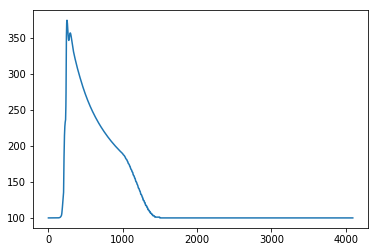

In [38]:
plt.plot(X_narray[6897])

## N=1



In [40]:
X_haar1=X_narray
for i in range(0,12):
    (X_haar1, cd) = pywt.dwt(X_haar1,'haar')


In [41]:
X_haar1.shape

(13800, 1)

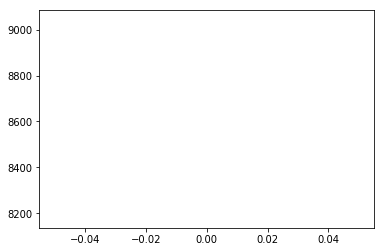

In [42]:
plt.plot(X_haar1[6897])

In [45]:
X_rec=X_haar1
for i in range(0,12):
    X_rec= pywt.idwt(X_rec, None, 'haar' )

In [46]:
X_rec.shape

(13800, 4096)

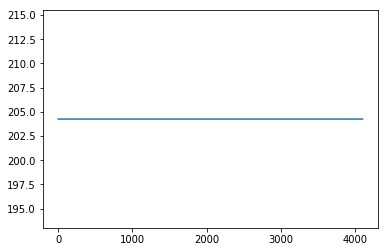

In [47]:
plt.plot(X_rec[2614]) ## Reconstructing the image from haar wavelet transform


### N=4

In [48]:
X_haar4=X_narray
for i in range(0,10):
    (X_haar4, cd) = pywt.dwt(X_haar4,'haar')


In [49]:
X_haar4.shape

(13800, 4)

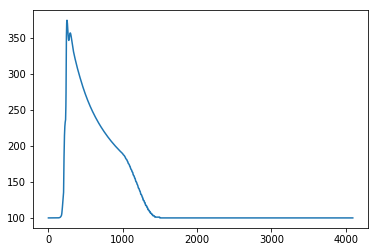

In [50]:
plt.plot(X_narray[6897])

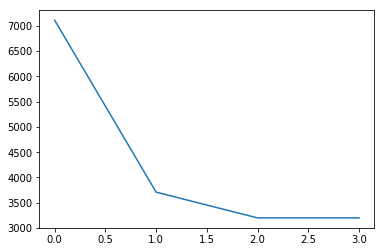

In [51]:
plt.plot(X_haar4[6897])

In [52]:
X_rec=X_haar4
for i in range(0,10):
    X_rec= pywt.idwt(X_rec, None, 'haar' )

In [53]:
X_rec.shape

(13800, 4096)

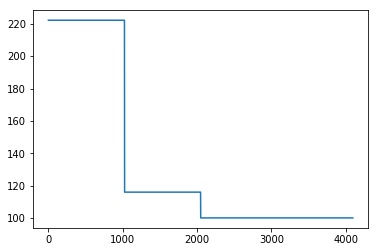

In [54]:
plt.plot(X_rec[6897]) ## Reconstructing the image from haar wavelet transform


### N=32

In [57]:
X_haar32 = X_narray
for i in range(0,7):
    (X_haar32, cd) = pywt.dwt(X_haar32,'haar')

In [58]:
X_haar32.shape

(13800, 32)

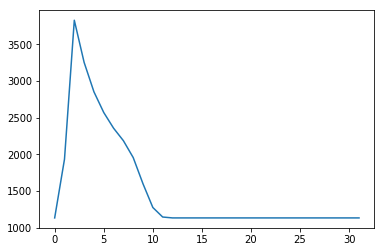

In [59]:
plt.plot(X_haar32[6897])

In [60]:
X_rec=X_haar32
for i in range(0,7):
    X_rec= pywt.idwt(X_rec, None, 'haar' )

In [61]:
X_rec.shape

(13800, 4096)

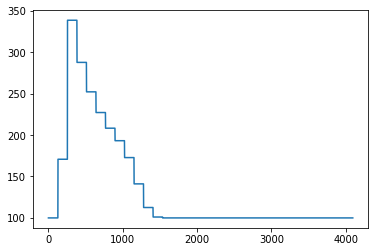

In [62]:
plt.plot(X_rec[6897]) ## Reconstructing the image from haar wavelet transform


### N=64

In [69]:
X_haar64 = X_narray
for i in range(0,6):
    (X_haar64, cd) = pywt.dwt(X_haar64,'haar')

In [70]:
X_haar64.shape

(13800, 64)

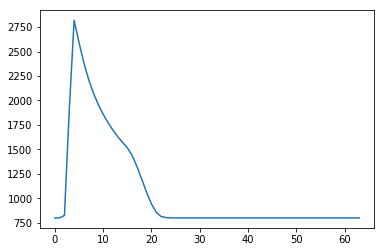

In [71]:
plt.plot(X_haar64[6897])

In [72]:
X_rec=X_haar64
for i in range(0,6):
    X_rec= pywt.idwt(X_rec, None, 'haar' )

In [73]:
X_rec.shape

(13800, 4096)

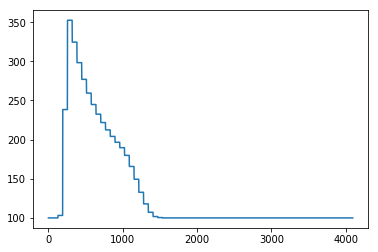

In [74]:
plt.plot(X_rec[6897]) ## Reconstructing the image from haar wavelet transform


### N=128

In [80]:
X_haar128 = X_narray
for i in range(0,5):
    (X_haar128, cd) = pywt.dwt(X_haar128,'haar')

In [81]:
X_haar128.shape

(13800, 128)

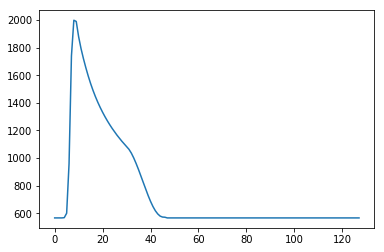

In [82]:
plt.plot(X_haar128[6897])

In [83]:
X_rec=X_haar128
for i in range(0,5):
    X_rec= pywt.idwt(X_rec, None, 'haar' )

In [84]:
X_rec.shape

(13800, 4096)

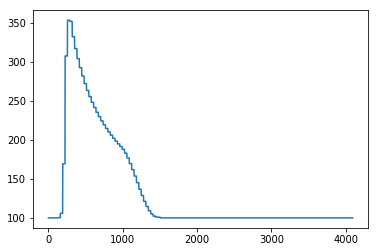

In [85]:
plt.plot(X_rec[6897]) ## Reconstructing the image from haar wavelet transform


### N=256

In [99]:
X_narray.shape

(13800, 4096)

In [86]:
X_haar256 = X_narray
for i in range(0,4):
    (X_haar256, cd) = pywt.dwt(X_haar256,'haar')

In [87]:
X_haar256.shape

(13800, 256)

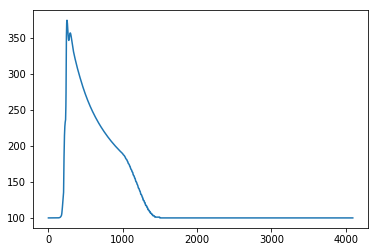

In [88]:
plt.plot(X_narray[6897])

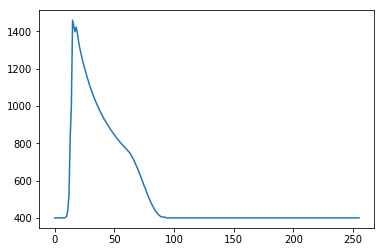

In [89]:
plt.plot(X_haar256[6897])

In [90]:
X_haar256new=X_haar256/(1.4145*1.4145*1.4145*1.4145*1.4145)

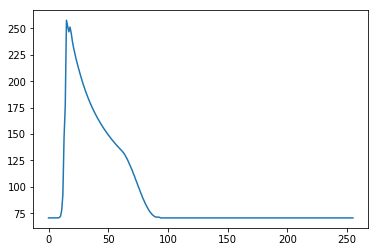

In [92]:
plt.plot(X_haar256new[6897])

In [93]:
X_rec=X_haar256
for i in range(0,4):
    X_rec= pywt.idwt(X_rec, None, 'haar' )

In [94]:
X_rec.shape

(13800, 4096)

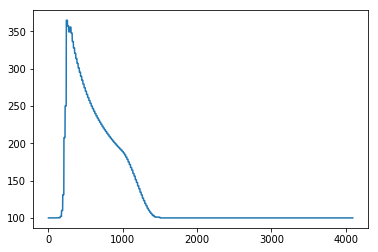

In [95]:
plt.plot(X_rec[6897]) ## Reconstructing the image from haar wavelet transform

### Choosing N=256

### K means

In [96]:
from sklearn.cluster import KMeans

In [97]:
X_haar256.shape

(13800, 256)

### Elbow method

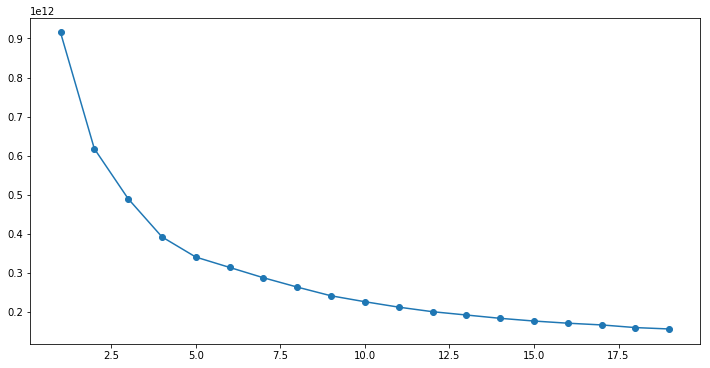

In [98]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( X_haar256 )
    cluster_errors.append( clusters.inertia_ )
    
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Choosing 3 clusters

In [136]:
# Number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++',random_state=25)
# Fitting the input data
kmeans = kmeans.fit(X_haar256)
# Getting the cluster labels
labels1 = kmeans.predict(X_haar256)
# Centroid values
centroids = kmeans.cluster_centers_

#Unique labels
np.unique(labels1)

array([0, 1, 2])

In [137]:
zero=0
one=0
two=0
for i in labels1:
    if i==0:
        zero=zero+1
    elif i==1:
        one=one+1
    elif i==2:
        two=two+1

In [138]:
print("Number of entries with 0 as the label :" , zero)
print("Number of entries with 1 as the label :" , one)
print("Number of entries with 2 as the label :" , two)

Number of entries with 0 as the label : 9323
Number of entries with 1 as the label : 1735
Number of entries with 2 as the label : 2742


In [139]:
labels1.shape

(13800,)

In [140]:
df=pd.DataFrame(X_narray)
df['Labels']=labels1
df

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,Labels
0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [141]:
df0 = df[df['Labels']==0] ### Labels with 0 in a dataframe
df0.shape
X_array0=df0.values
print(X_array0.shape)

df1 = df[df['Labels']==1] ### Labels with 1 in a dataframe
df1.shape
X_array1=df1.values
print(X_array1.shape)

df2 = df[df['Labels']==2] ### Labels with 2 in a dataframe
df2.shape
X_array2=df2.values
print(X_array2.shape)


(9323, 4097)
(1735, 4097)
(2742, 4097)


In [142]:
mean0=[]
sd0=[]

mean1=[]
sd1=[]

mean2=[]
sd2=[]


In [143]:
np.std(X_array0[:,1])

55.379991955505325

In [144]:
for i in range(0,4096):
    mean0.append(np.mean(X_array0[:,i]))   # Finding mean, sd for cluster 0
    sd0.append(np.std(X_array0[:,i]))
    
    mean1.append(np.mean(X_array1[:,i]))   # Finding mean, sd for cluster 1
    sd1.append(np.std(X_array1[:,i]))
    
    mean2.append(np.mean(X_array2[:,i]))   # Finding mean, sd for cluster 2
    sd2.append(np.std(X_array2[:,i]))
   
    

In [145]:
mean0=np.asarray(mean0)
sd0=np.asarray(sd0)

mean1=np.asarray(mean1)
sd1=np.asarray(sd1)

mean2=np.asarray(mean2)
sd2=np.asarray(sd2)

In [146]:
mean01=mean0+sd0
mean02=mean0-sd0

mean11=mean1+sd1
mean12=mean1-sd1

mean21=mean2+sd2
mean22=mean2-sd2

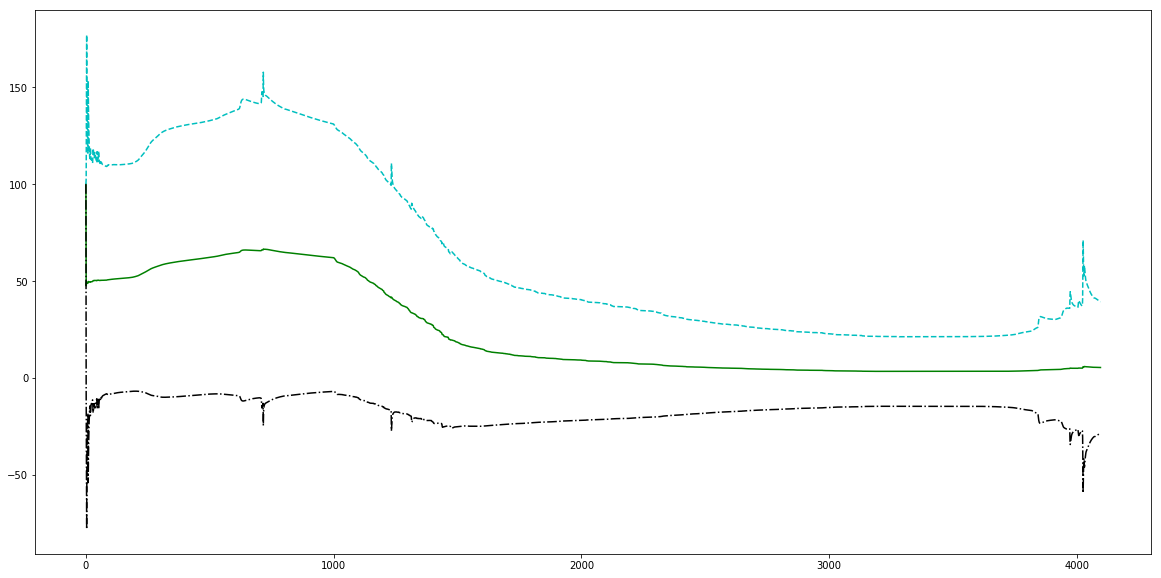

In [147]:
plt.figure(figsize=(20,10))
plt.plot(mean0, '-g')  # solid green
plt.plot(mean01, '--c') # dashed cyan
plt.plot(mean02, '-.k') # dashdot black

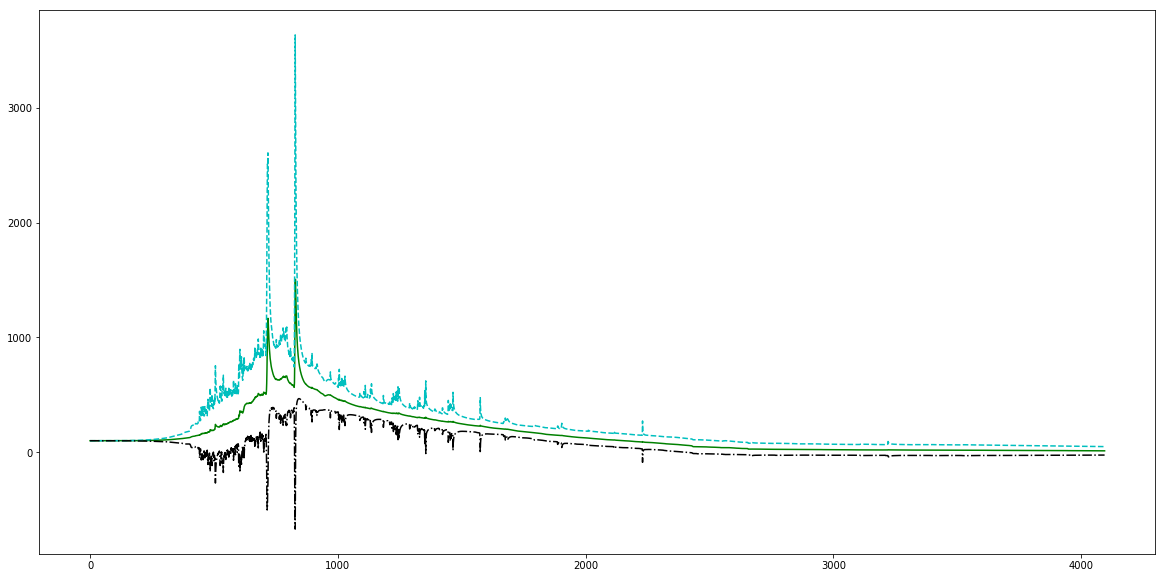

In [148]:
plt.figure(figsize=(20,10))
plt.plot(mean1, '-g')  # solid green
plt.plot(mean11, '--c') # dashed cyan
plt.plot(mean12, '-.k') # dashdot black

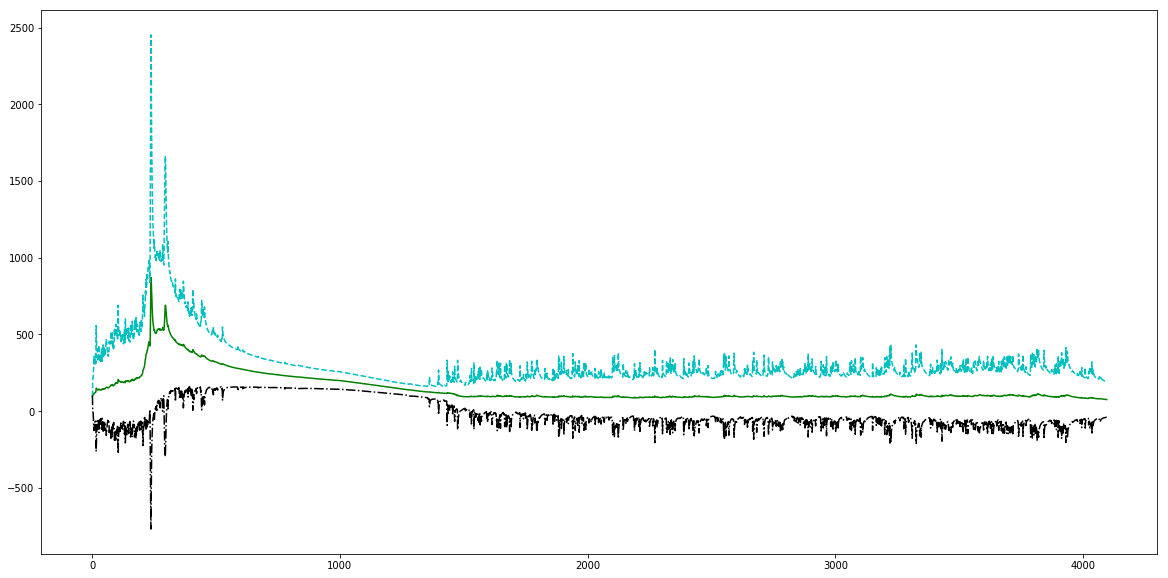

In [149]:
plt.figure(figsize=(20,10))
plt.plot(mean2, '-g')  # solid green
plt.plot(mean21, '--c') # dashed cyan
plt.plot(mean22, '-.k') # dashdot black

In [150]:
# Copying just the label values in a separate dataframe

labels_df = df['Labels']
labels_df = pd.DataFrame(labels_df)
labels_df.index.name = 'Image index'
labels_df.columns=['Labels(3clusters)']
labels_df

,Labels(3clusters)
Image index,
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0


### Choosing number of clusters as 5

In [151]:
# Number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++',random_state=30)
# Fitting the input data
kmeans = kmeans.fit(X_haar256)
# Getting the cluster labels
labels2 = kmeans.predict(X_haar256)
# Centroid values
centroids = kmeans.cluster_centers_

#Unique labels
np.unique(labels2)

array([0, 1, 2, 3, 4])

In [152]:
zero=0
one=0
two=0
three=0
four=0
for i in labels2:
    if i==0:
        zero=zero+1
    elif i==1:
        one=one+1
    elif i==2:
        two=two+1
    elif i==3:
        three=three+1
    elif i==4:
        four=four+1

In [153]:
print("Number of entries with 0 as the label :" , zero)
print("Number of entries with 1 as the label :" , one)
print("Number of entries with 2 as the label :" , two)
print("Number of entries with 3 as the label :" , three)
print("Number of entries with 4 as the label :" , four)

Number of entries with 0 as the label : 1489
Number of entries with 1 as the label : 4861
Number of entries with 2 as the label : 4920
Number of entries with 3 as the label : 1649
Number of entries with 4 as the label : 881


In [154]:
labels2.shape

(13800,)

In [155]:
df=pd.DataFrame(X_narray)
df['Labels2']=labels2
df

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,Labels2
0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
5,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
7,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
8,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [156]:
df0 = df[df['Labels2']==0] ### Labels with 0 in a dataframe
df0.shape
X_array0=df0.values
X_array0.shape

(1489, 4097)

In [157]:
df1 = df[df['Labels2']==1] ### Labels with 1 in a dataframe
df1.shape
X_array1=df1.values
X_array1.shape

(4861, 4097)

In [158]:
df2 = df[df['Labels2']==2] ### Labels with 2 in a dataframe
df2.shape
X_array2=df2.values
X_array2.shape

(4920, 4097)

In [159]:
df3 = df[df['Labels2']==3] ### Labels with 3 in a dataframe
df3.shape
X_array3=df3.values
X_array3.shape

(1649, 4097)

In [160]:
df4 = df[df['Labels2']==4] ### Labels with 4 in a dataframe
df4.shape
X_array4=df4.values
X_array4.shape

(881, 4097)

In [161]:
mean0=[]
sd0=[]

mean1=[]
sd1=[]

mean2=[]
sd2=[]

mean3=[]
sd3=[]

mean4=[]
sd4=[]

In [162]:
for i in range(0,4096):
    mean0.append(np.mean(X_array0[:,i]))   # Finding mean, sd for cluster 0
    sd0.append(np.std(X_array0[:,i]))
    
    mean1.append(np.mean(X_array1[:,i]))   # Finding mean, sd for cluster 1
    sd1.append(np.std(X_array1[:,i]))
    
    mean2.append(np.mean(X_array2[:,i]))   # Finding mean, sd for cluster 2
    sd2.append(np.std(X_array2[:,i]))
    
    mean3.append(np.mean(X_array3[:,i]))   # Finding mean, sd for cluster 3
    sd3.append(np.std(X_array3[:,i]))
    
    mean4.append(np.mean(X_array4[:,i]))   # Finding mean, sd for cluster 4
    sd4.append(np.std(X_array4[:,i]))
   
   
   

In [163]:
mean0=np.asarray(mean0)
sd0=np.asarray(sd0)

mean1=np.asarray(mean1)
sd1=np.asarray(sd1)

mean2=np.asarray(mean2)
sd2=np.asarray(sd2)

mean3=np.asarray(mean3)
sd3=np.asarray(sd3)

mean4=np.asarray(mean4)
sd4=np.asarray(sd4)

In [164]:
mean01=mean0+sd0
mean02=mean0-sd0

mean11=mean1+sd1
mean12=mean1-sd1

mean21=mean2+sd2
mean22=mean2-sd2

mean31=mean3+sd3
mean32=mean3-sd3

mean41=mean4+sd4
mean42=mean4-sd4

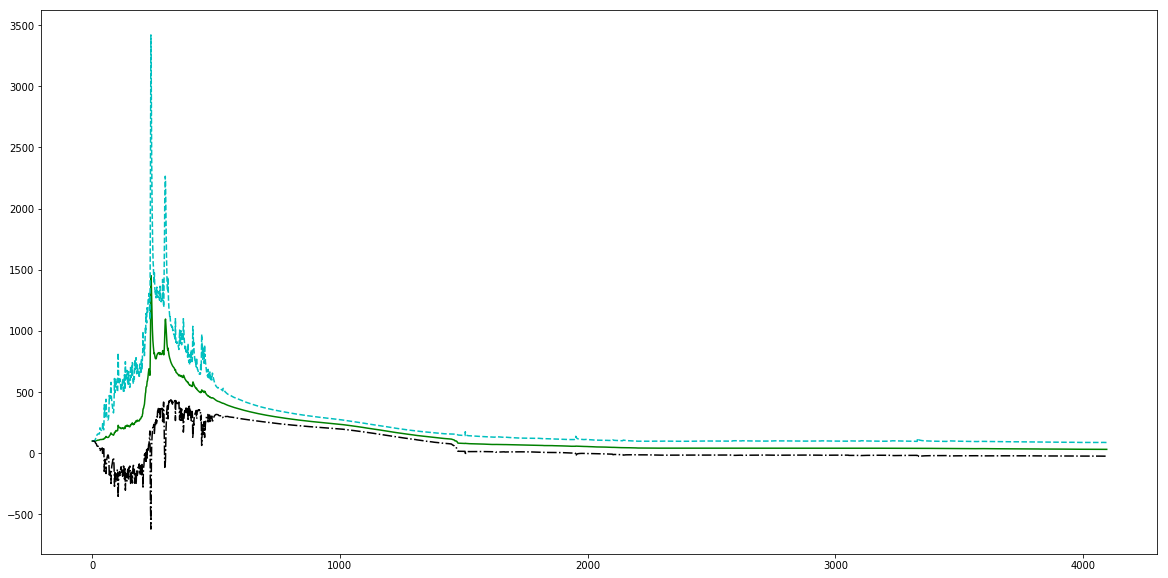

In [165]:
plt.figure(figsize=(20,10))
plt.plot(mean0, '-g')  # solid green
plt.plot(mean01, '--c') # dashed cyan
plt.plot(mean02, '-.k') # dashdot black

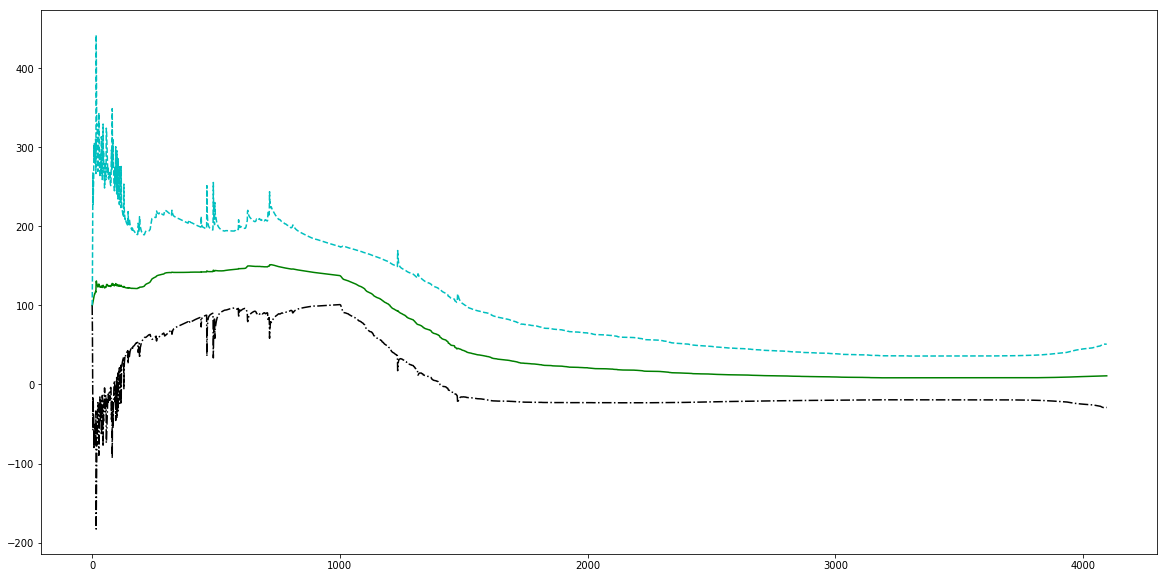

In [166]:
plt.figure(figsize=(20,10))
plt.plot(mean1, '-g')  # solid green
plt.plot(mean11, '--c') # dashed cyan
plt.plot(mean12, '-.k') # dashdot black

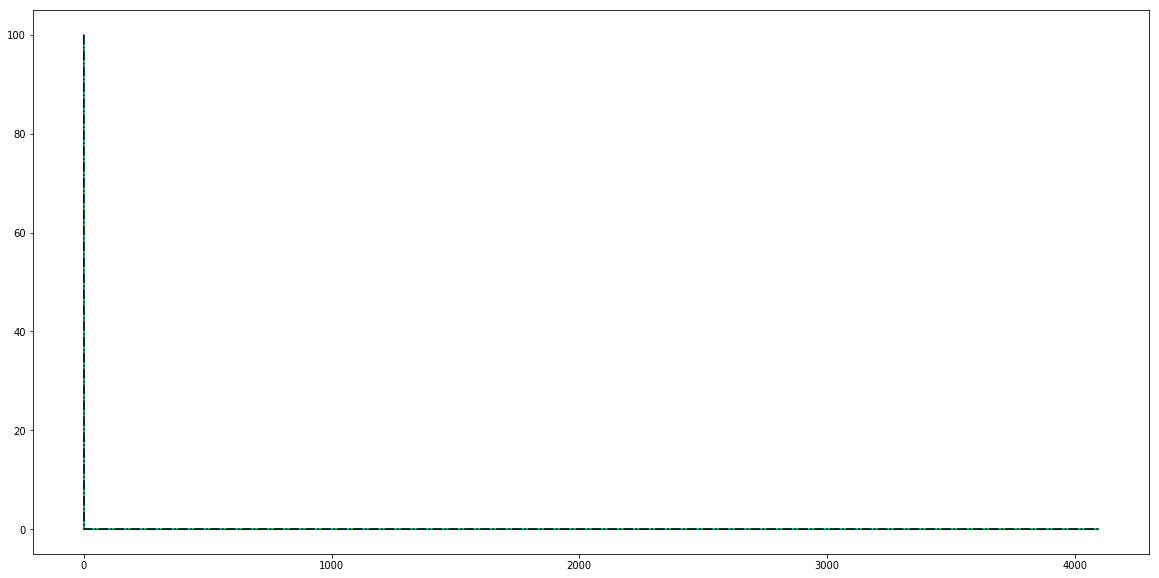

In [167]:
plt.figure(figsize=(20,10))
plt.plot(mean2, '-g')  # solid green
plt.plot(mean21, '--c') # dashed cyan
plt.plot(mean22, '-.k') # dashdot black

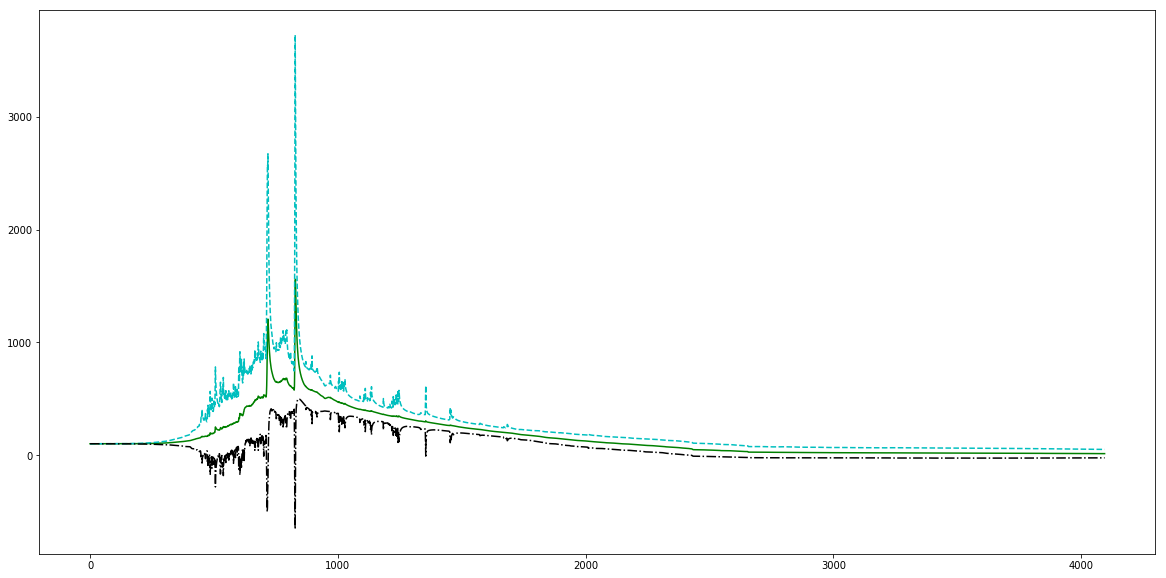

In [168]:
plt.figure(figsize=(20,10))
plt.plot(mean3, '-g')  # solid green
plt.plot(mean31, '--c') # dashed cyan
plt.plot(mean32, '-.k') # dashdot black

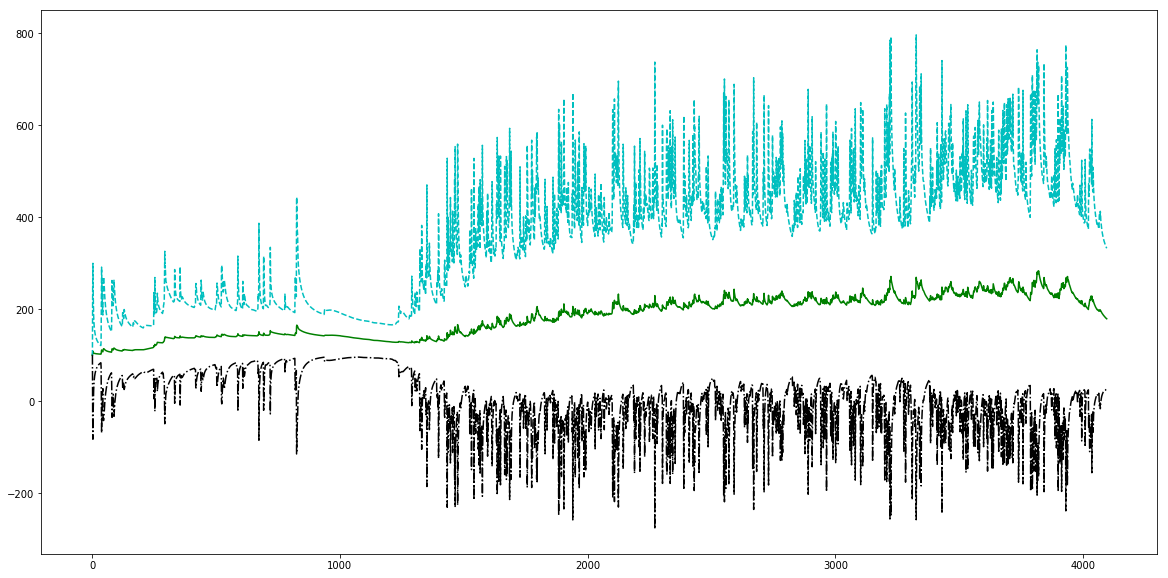

In [169]:
plt.figure(figsize=(20,10))
plt.plot(mean4, '-g')  # solid green
plt.plot(mean41, '--c') # dashed cyan
plt.plot(mean42, '-.k') # dashdot black

In [170]:
# Copying just the label values in a separate dataframe

labels_df['Labels(5clusters)'] = df['Labels2']
labels_df = pd.DataFrame(labels_df)
labels_df.shape

(13800, 2)

In [171]:
labels_df.to_csv('Newlabels.csv')


In [172]:
labels_df.to_csv('Newlabels.txt')


### Choosing number of clusters 10

In [71]:
# Number of clusters
kmeans = KMeans(n_clusters=10)
# Fitting the input data
kmeans = kmeans.fit(X_haar256)
# Getting the cluster labels
labels = kmeans.predict(X_haar256)
# Centroid values
centroids = kmeans.cluster_centers_

#Unique labels
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [74]:
zero=0
one=0
two=0
three=0
four=0
five=0
six=0
seven=0
eight=0
nine=0
for i in labels:
    if i==0:
        zero=zero+1
    elif i==1:
        one=one+1
    elif i==2:
        two=two+1
    elif i==3:
        three=three+1
    elif i==4:
        four=four+1
    elif i==5:
        five=five+1
    elif i==6:
        six=six+1
    elif i==7:
        seven=seven+1
    elif i==8:
        eight=eight+1
    elif i==9:
        nine=nine+1
    

In [75]:
print("Number of entries with 0 as the label :" , zero)
print("Number of entries with 1 as the label :" , one)
print("Number of entries with 2 as the label :" , two)
print("Number of entries with 3 as the label :" , three)
print("Number of entries with 4 as the label :" , four)
print("Number of entries with 5 as the label :" , five)
print("Number of entries with 6 as the label :" , six)
print("Number of entries with 7 as the label :" , seven)
print("Number of entries with 8 as the label :" , eight)
print("Number of entries with 9 as the label :" , nine)

Number of entries with 0 as the label : 4923
Number of entries with 1 as the label : 1620
Number of entries with 2 as the label : 467
Number of entries with 3 as the label : 2436
Number of entries with 4 as the label : 401
Number of entries with 5 as the label : 1493
Number of entries with 6 as the label : 433
Number of entries with 7 as the label : 1024
Number of entries with 8 as the label : 676
Number of entries with 9 as the label : 327


In [76]:
labels.shape

(13800,)

In [77]:
df=pd.DataFrame(X_narray)
df['Labels']=labels

In [78]:
df0 = df[df['Labels']==0] ### Labels with 0 in a dataframe
df0.shape
X_array0=df0.values
print(X_array0.shape)

df1 = df[df['Labels']==1] ### Labels with 1 in a dataframe
df1.shape
X_array1=df1.values
print(X_array1.shape)

df2 = df[df['Labels']==2] ### Labels with 2 in a dataframe
df2.shape
X_array2=df2.values
print(X_array2.shape)

df3 = df[df['Labels']==3] ### Labels with 3 in a dataframe
df3.shape
X_array3=df3.values
print(X_array3.shape)

df4 = df[df['Labels']==4] ### Labels with 4 in a dataframe
df4.shape
X_array4=df4.values
print(X_array4.shape)

df5 = df[df['Labels']==5] ### Labels with 5 in a dataframe
df5.shape
X_array5=df5.values
print(X_array5.shape)

df6 = df[df['Labels']==6] ### Labels with 6 in a dataframe
df6.shape
X_array6=df6.values
print(X_array6.shape)

df7 = df[df['Labels']==7] ### Labels with 7 in a dataframe
df7.shape
X_array7=df7.values
print(X_array7.shape)

df8 = df[df['Labels']==8] ### Labels with 8 in a dataframe
df8.shape
X_array8=df8.values
print(X_array8.shape)

df9 = df[df['Labels']==9] ### Labels with 9 in a dataframe
df9.shape
X_array9=df9.values
print(X_array9.shape)


(4923, 8193)
(1620, 8193)
(467, 8193)
(2436, 8193)
(401, 8193)
(1493, 8193)
(433, 8193)
(1024, 8193)
(676, 8193)
(327, 8193)


In [82]:
mean0=[]
max0=[]
min0=[]
mean1=[]
max1=[]
min1=[]
mean2=[]
max2=[]
min2=[]
mean3=[]
max3=[]
min3=[]
mean4=[]
max4=[]
min4=[]
mean5=[]
max5=[]
min5=[]
mean6=[]
max6=[]
min6=[]
mean7=[]
max7=[]
min7=[]
mean8=[]
max8=[]
min8=[]
mean9=[]
max9=[]
min9=[]

In [83]:
for i in range(0,8192):
    mean0.append(np.mean(X_array0[:,i]))   # Finding mean, max and min for cluster 0
    max0.append(max(X_array0[:,i]))
    min0.append(min(X_array0[:,i]))
    
    mean1.append(np.mean(X_array1[:,i]))   # Finding mean, max and min for cluster 1
    max1.append(max(X_array1[:,i]))
    min1.append(min(X_array1[:,i]))
    
    mean2.append(np.mean(X_array2[:,i]))   # Finding mean, max and min for cluster 2
    max2.append(max(X_array2[:,i]))
    min2.append(min(X_array2[:,i]))
    
    mean3.append(np.mean(X_array3[:,i]))   # Finding mean, max and min for cluster 3
    max3.append(max(X_array3[:,i]))
    min3.append(min(X_array3[:,i]))
    
    mean4.append(np.mean(X_array4[:,i]))   # Finding mean, max and min for cluster 4
    max4.append(max(X_array4[:,i]))
    min4.append(min(X_array4[:,i]))
    
    mean5.append(np.mean(X_array5[:,i]))   # Finding mean, max and min for cluster 5
    max5.append(max(X_array5[:,i]))
    min5.append(min(X_array5[:,i]))
    
    mean6.append(np.mean(X_array6[:,i]))   # Finding mean, max and min for cluster 6
    max6.append(max(X_array6[:,i]))
    min6.append(min(X_array6[:,i]))
    
    mean7.append(np.mean(X_array7[:,i]))   # Finding mean, max and min for cluster 7
    max7.append(max(X_array7[:,i]))
    min7.append(min(X_array7[:,i]))
    
    mean8.append(np.mean(X_array8[:,i]))   # Finding mean, max and min for cluster 8
    max8.append(max(X_array8[:,i]))
    min8.append(min(X_array8[:,i]))
    
    mean9.append(np.mean(X_array9[:,i]))   # Finding mean, max and min for cluster 9
    max9.append(max(X_array9[:,i]))
    min9.append(min(X_array9[:,i]))
        

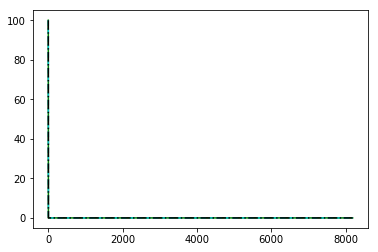

In [88]:
plt.plot(mean0, '-g')  # solid green
plt.plot(max0, '--c') # dashed cyan
plt.plot(min0, '-.k') # dashdot black

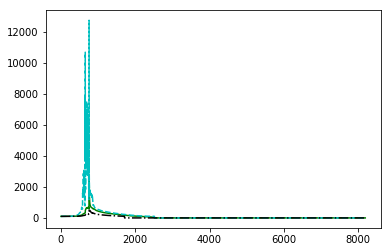

In [89]:
plt.plot(mean1, '-g')  # solid green
plt.plot(max1, '--c') # dashed cyan
plt.plot(min1, '-.k') # dashdot black

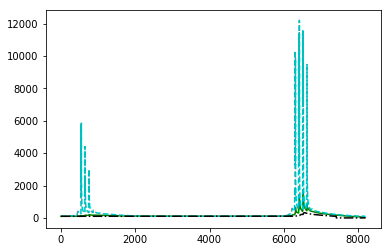

In [90]:
plt.plot(mean2, '-g')  # solid green
plt.plot(max2, '--c') # dashed cyan
plt.plot(min2, '-.k') # dashdot black

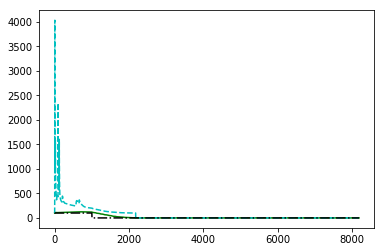

In [91]:
plt.plot(mean3, '-g')  # solid green
plt.plot(max3, '--c') # dashed cyan
plt.plot(min3, '-.k') # dashdot black

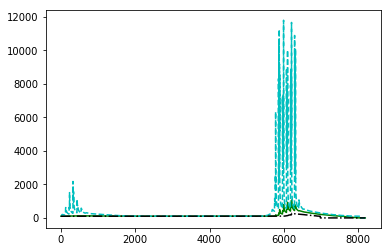

In [92]:
plt.plot(mean4, '-g')  # solid green
plt.plot(max4, '--c') # dashed cyan
plt.plot(min4, '-.k') # dashdot black

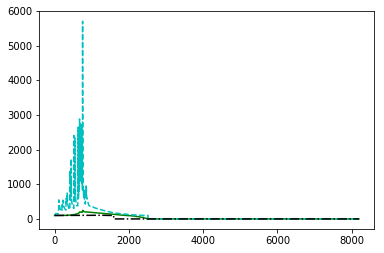

In [93]:
plt.plot(mean5, '-g')  # solid green
plt.plot(max5, '--c') # dashed cyan
plt.plot(min5, '-.k') # dashdot black

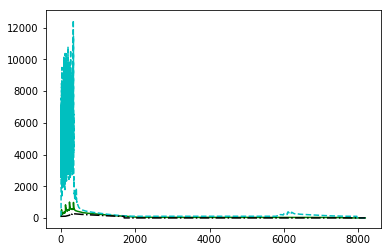

In [94]:
plt.plot(mean6, '-g')  # solid green
plt.plot(max6, '--c') # dashed cyan
plt.plot(min6, '-.k') # dashdot black

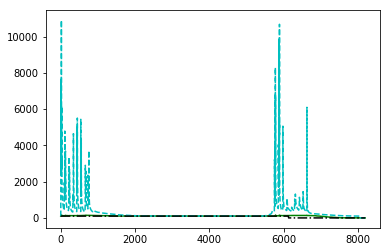

In [95]:
plt.plot(mean7, '-g')  # solid green
plt.plot(max7, '--c') # dashed cyan
plt.plot(min7, '-.k') # dashdot black

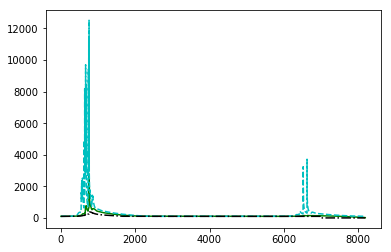

In [96]:
plt.plot(mean8, '-g')  # solid green
plt.plot(max8, '--c') # dashed cyan
plt.plot(min8, '-.k') # dashdot black

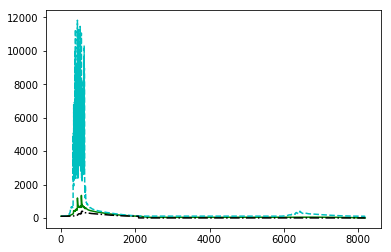

In [97]:
plt.plot(mean9, '-g')  # solid green
plt.plot(max9, '--c') # dashed cyan
plt.plot(min9, '-.k') # dashdot black

## Mini Batch K Means